<a href="https://colab.research.google.com/github/Debojyoti83/Enhancing-Credit-Assessment-and-Loan-Customization-for-LoanTap-Logistic-Regression/blob/main/LoanTap_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LoanTap -- Logistic Regression**

#**Import Libraries :**

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Stats & model building
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, average_precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from collections import Counter

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#**Loading The Dataset :**

In [ ]:
!gdown 1Bd9Yn-_95xqwm4jH1kaYKpWB9rccGPqo

Downloading...
From: https://drive.google.com/uc?id=1Bd9Yn-_95xqwm4jH1kaYKpWB9rccGPqo
To: /content/logistic_regression.csv
100% 100M/100M [00:04<00:00, 21.7MB/s] 


In [ ]:
df_main = pd.read_csv("/content/logistic_regression.csv")
df = df_main.copy()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
print('Rows:', df.shape[0],'\n' 'Columns: ',df.shape[1])

Rows: 396030 
Columns:  27


#**Data Cleaning :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#**Checking Column Datatypes & Balance :**

In [ ]:
print('-'*50)
print(f'Shape of Data : {df.shape}')
print('-'*50)
print(f'Percentage distribution of Target Variable : ')
print(np.round(df['loan_status'].value_counts(normalize=True) *100, 2))
print('-'*50)

--------------------------------------------------
Shape of Data : (396030, 27)
--------------------------------------------------
Percentage distribution of Target Variable : 
Fully Paid     80.39
Charged Off    19.61
Name: loan_status, dtype: float64
--------------------------------------------------


* Target variable distribution is 80%-20%. Data is **significantly imbalanced**

In [ ]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
# number of unique values for categorcal vairbales
for col in cat_cols:
    print(f"{col:20}: {df[col].nunique()}")

term                : 2
grade               : 7
sub_grade           : 35
emp_title           : 173105
emp_length          : 11
home_ownership      : 6
verification_status : 3
issue_d             : 115
loan_status         : 2
purpose             : 14
title               : 48817
earliest_cr_line    : 684
initial_list_status : 2
application_type    : 3
address             : 393700


#**Duplicate Value :**

In [ ]:
df.duplicated().sum()

0

**There is no duplicate values present in dataset.**

#**Missing Values & Their Treatment :**

In [ ]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    # Number and percentage of missing data in data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


* There are 6 features with missing values in the dataset. 'mort_acc' have around 10% of observations with missing values, followed by 'emp_title' (6%) and 'emp_length' (>5%). 'title' , 'pub_rec_bankruptcies' and 'revol_util' have less than 0.5% missing values.

In [ ]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [ ]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [ ]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
emp_length,18301,4.621115
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


* Since we have significant amount of clean data available, we will go ahead and drop these rows (with missing values < 5%)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

#**Creating New/ Derived Columns :**

In [ ]:
#creating 'state' & 'pincode' from 'address'
def get_state(address):
    state = address.split()[-2]
    return state

def get_zipcode(address):
    zip_code = address.split()[-1]
    return zip_code

df['state'] = df['address'].apply(get_state)
df['zip_code'] = df['address'].apply(get_zipcode)
df = df.drop(columns=['address'])

In [ ]:
#Creating Credit_line_months = months(earliest_cr_line - issue_d)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['Credit_line_months'] = ((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'M'))
df['Credit_line_months'] = df['Credit_line_months'].astype(np.int64)
df['Credit_line_months']
df = df.drop(columns=['issue_d', 'earliest_cr_line'])

In [ ]:
#Modifying pub_rec, pub_rec_bankruptcies, mort_acc into 0 or 1
def convert_binary(value):
    if value == 0 : return 0
    elif value >=1: return 1
    else: return np.nan

df['pub_rec'] = df['pub_rec'].apply(convert_binary)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(convert_binary)
df['mort_acc'] = df['mort_acc'].apply(convert_binary)

#**Outlier Treatment :**

In [ ]:
def uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,2))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})

    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

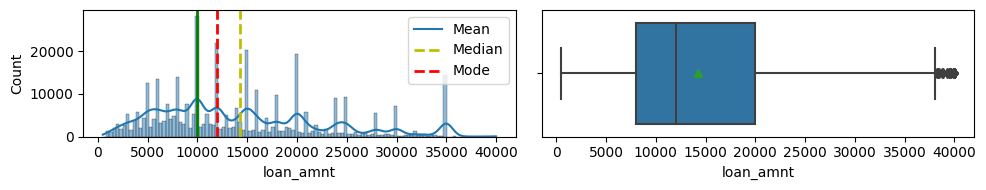

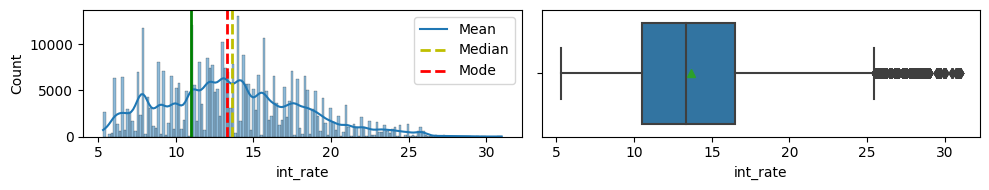

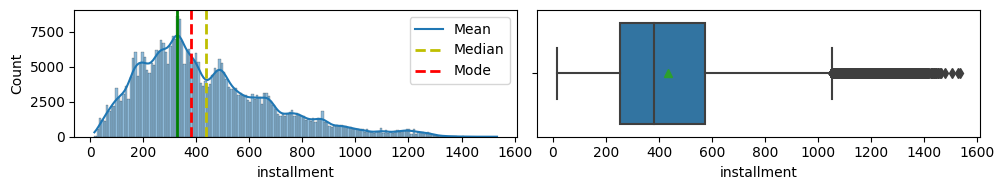

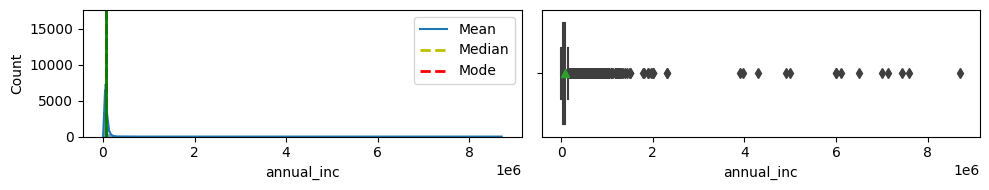

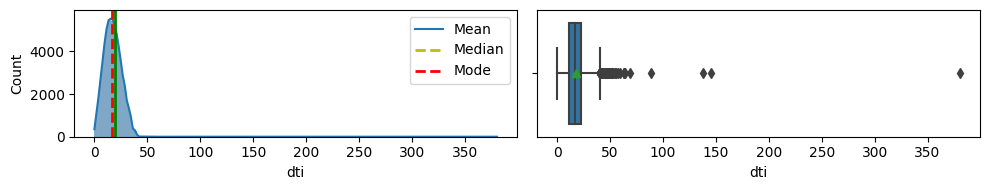

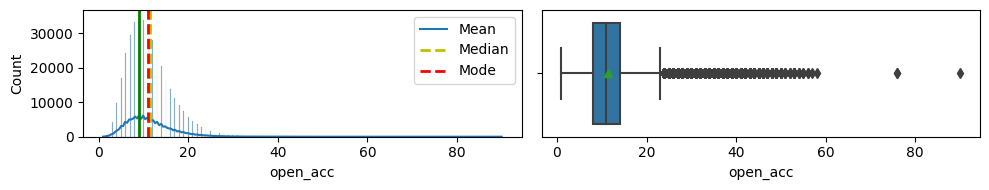

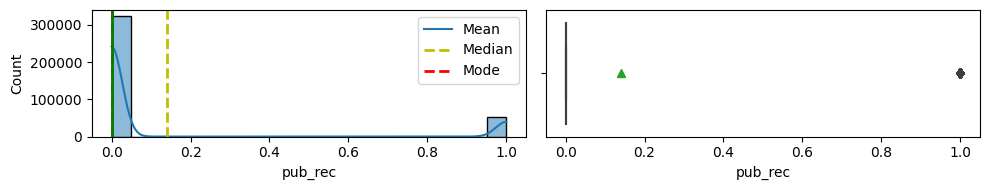

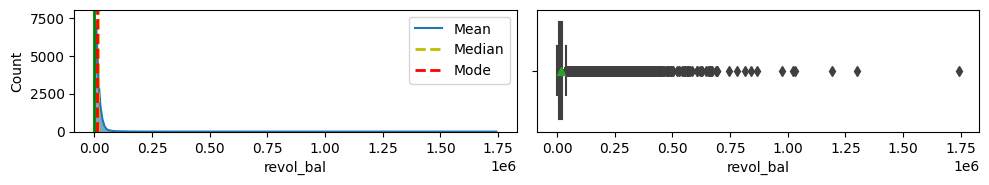

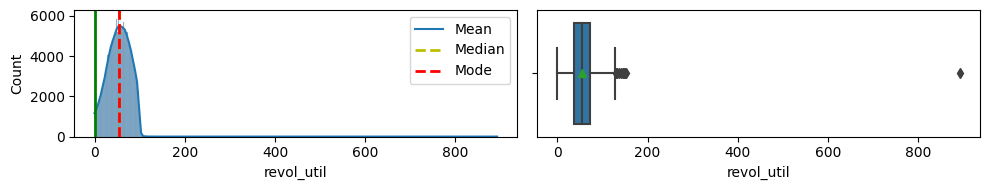

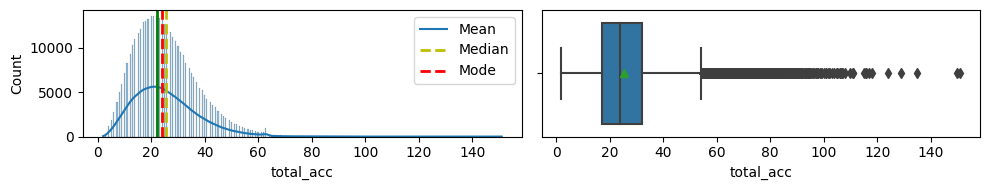

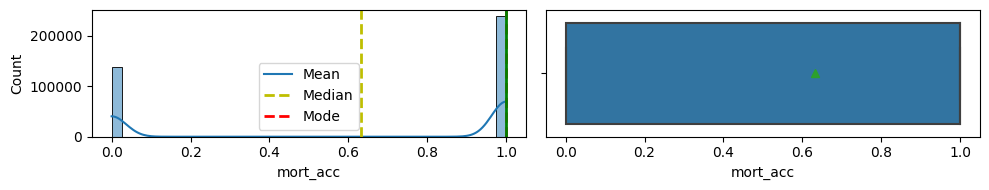

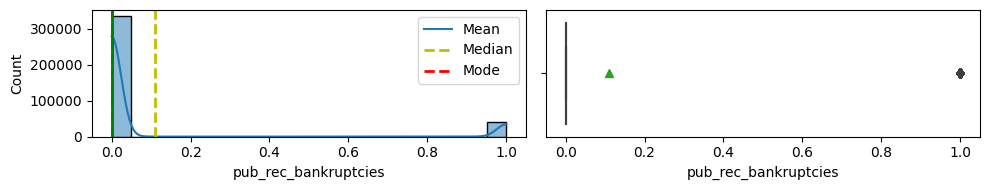

In [ ]:
for f in num_cols:
    uni(df[f])
plt.show()

* Data is highly left skewed. It means there are outliers present in the dataset.
* Almost all the continuous features have outliers present in the dataset.

In [ ]:
#Columns identified to have Outliers
outlier_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc','revol_bal','revol_util',
                   'total_acc', 'Credit_line_months' ]

In [ ]:
#treating outliers:
def treat_outlier(variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1,q3=np.percentile(variable,[25,75])
    iqr = q3-q1
    lo_range = q1-(1.5*iqr)
    up_range = q3+(1.5*iqr)
    return lo_range,up_range

In [ ]:
for col in outlier_columns:
    ir,ur=treat_outlier(df[col])
    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<ir,ir,df[col])

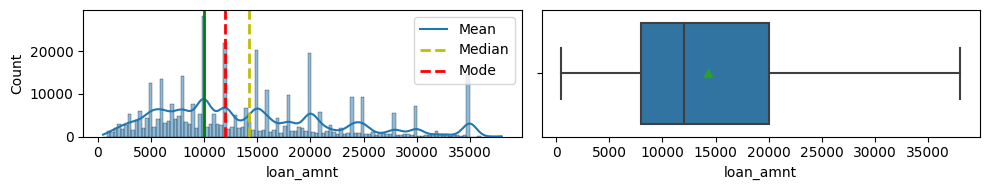

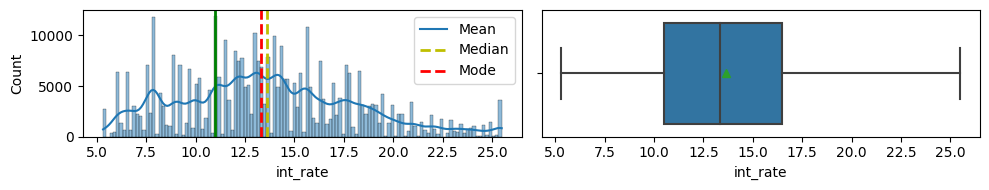

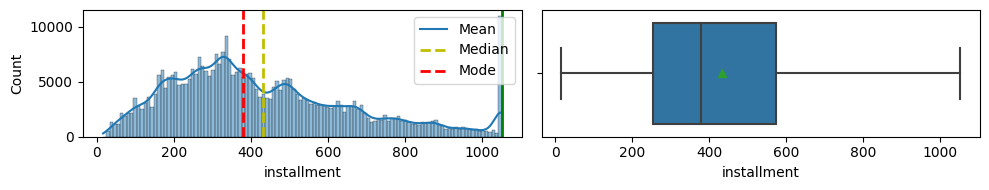

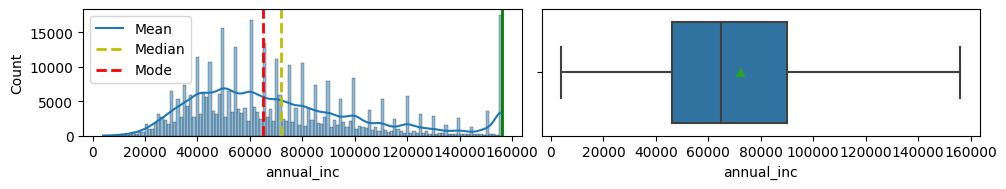

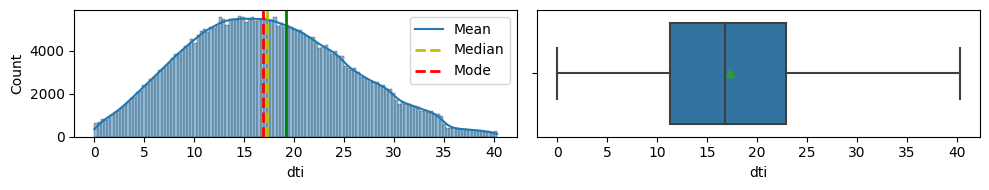

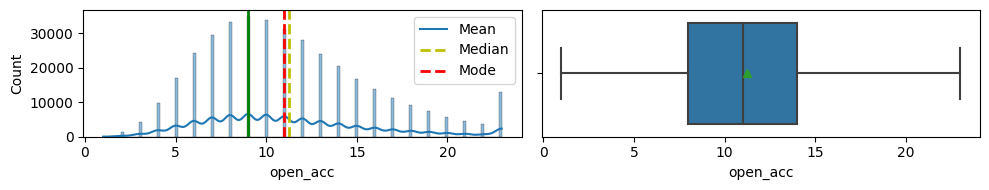

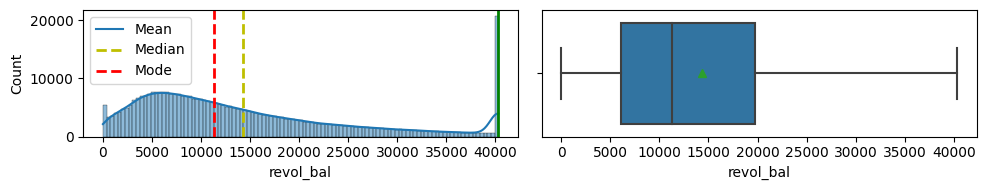

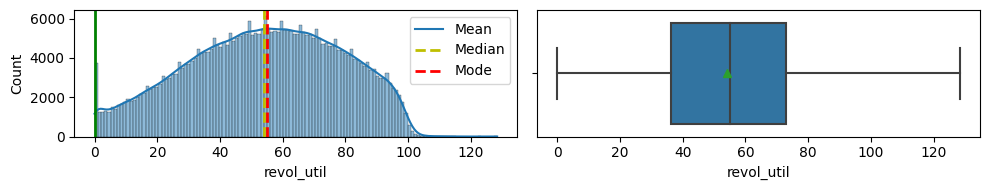

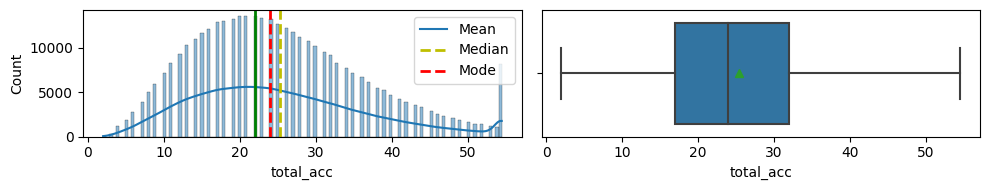

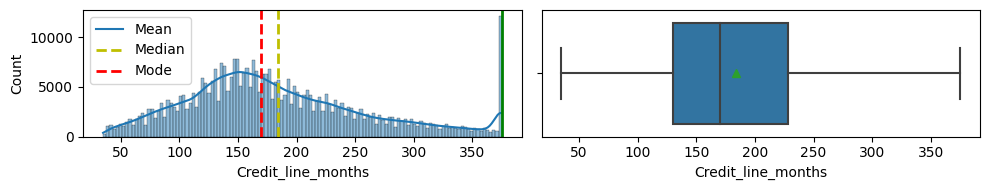

In [ ]:
#Lets check where outliers are removed or not:
for f in outlier_columns:
    uni(df[f])
plt.show()

#**Exploratory Data Analysis :**

* **Univariate Analysis**

In [ ]:
hist_columns1 = ['loan_amnt', 'int_rate', 'installment','annual_inc','dti','open_acc', 'Credit_line_months']
hist_columns2 =  ['revol_bal','revol_util','total_acc','mort_acc', 'pub_rec', 'pub_rec_bankruptcies']
hist_columns = hist_columns1 + hist_columns2


countplot_columns1= ['term','loan_status','home_ownership','verification_status','initial_list_status','application_type']
countplot_columns2 = ['grade','purpose', 'emp_length', 'zip_code']

countplot_columns = countplot_columns1 + countplot_columns2

----------------------------------------------------------------------
Univariate Analysis - Histograms of Continuous Variables
----------------------------------------------------------------------


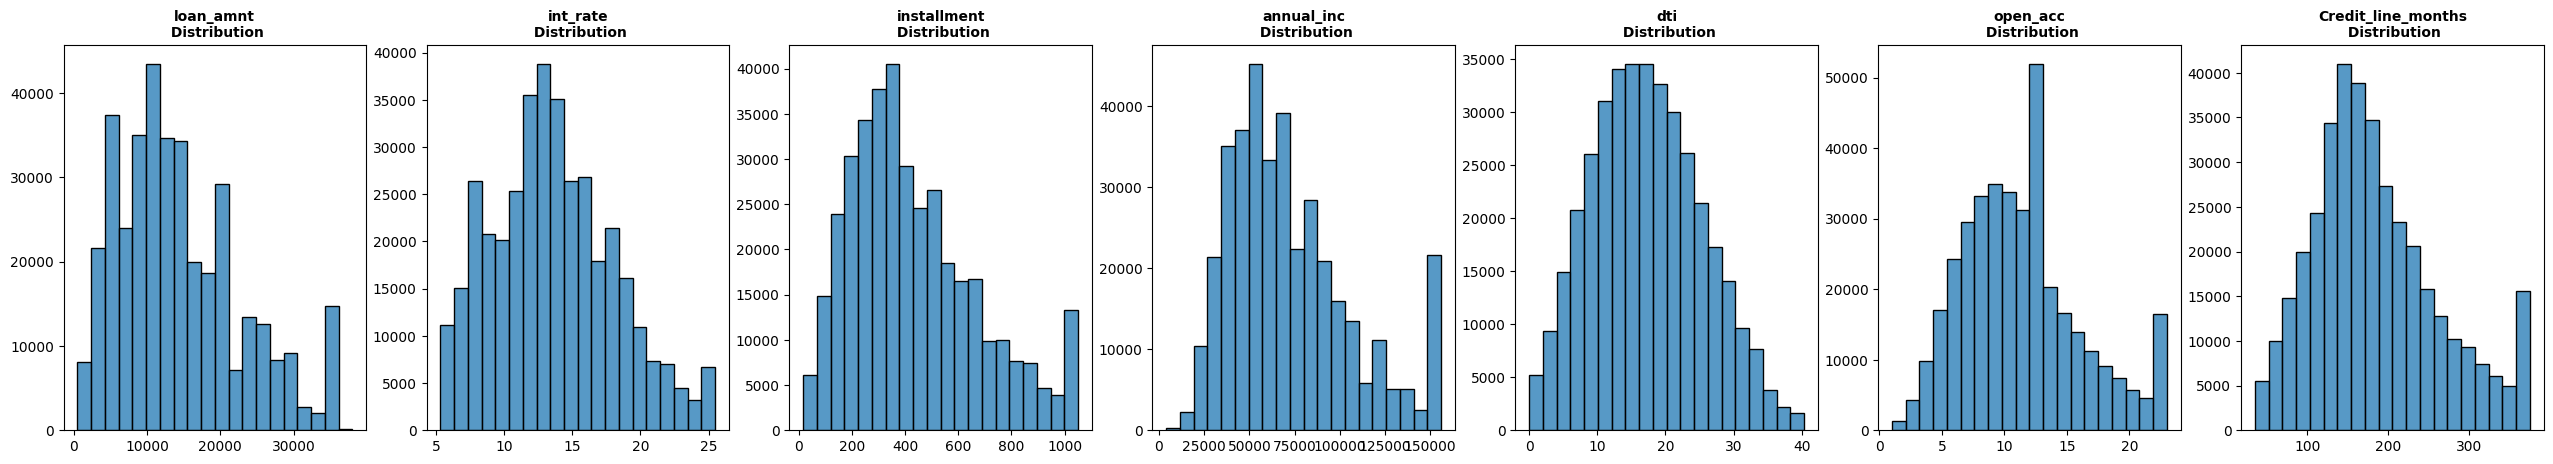

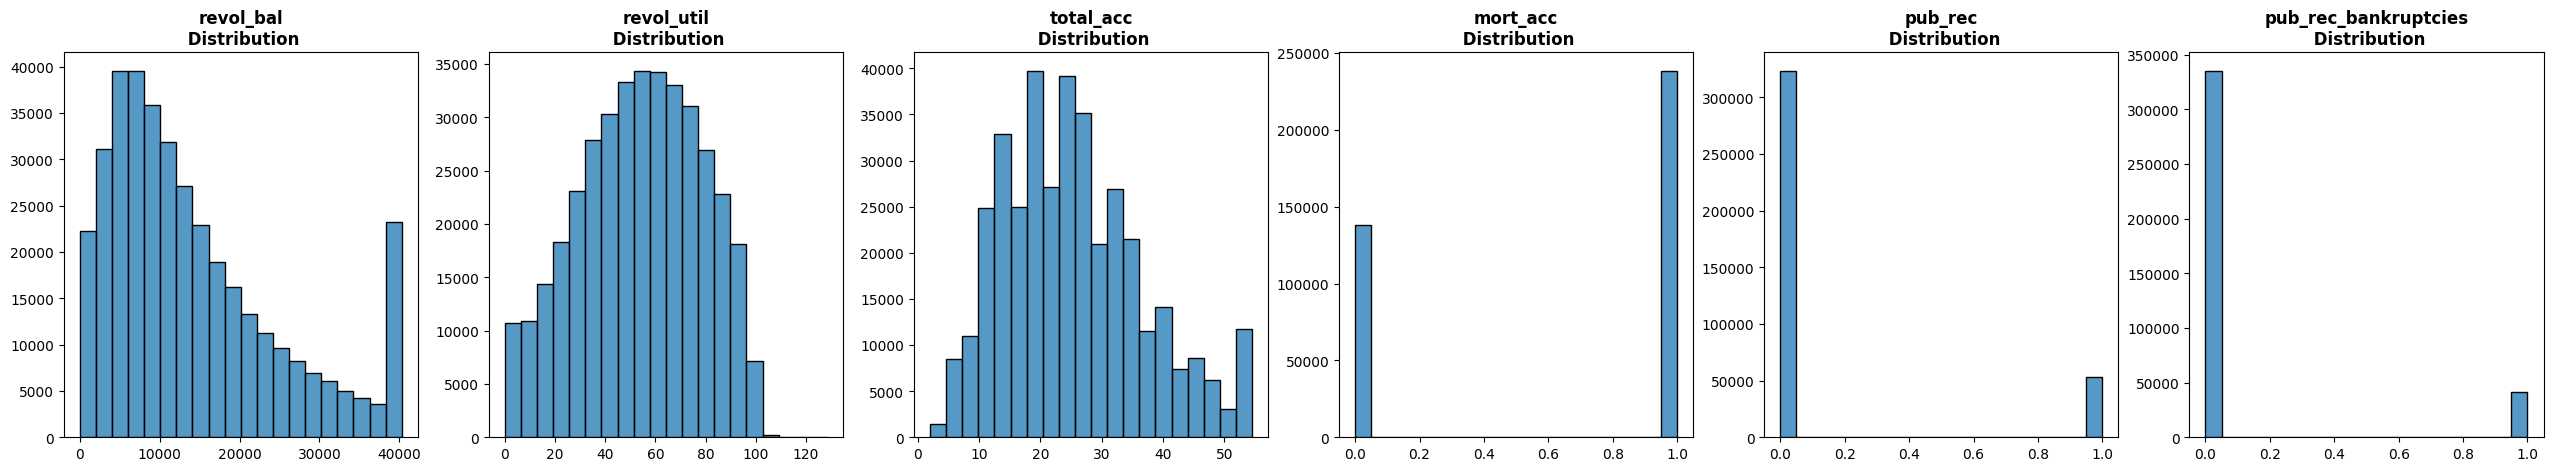

In [ ]:
#Creating Histogram for all Continuous variable Columns in dataset
columns = hist_columns1
print('-'*70)
print('Univariate Analysis - Histograms of Continuous Variables')
print('-'*70)
plt.figure(figsize=(32,5))
for index, column in enumerate(columns):
    plt.subplot(1,len(columns),index+1)
    sns.histplot(x=column, data=df, bins = 20)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(column + '\n Distribution', fontsize = 10, fontweight = 'bold')
plt.show()

columns = hist_columns2
plt.figure(figsize=(32,5))
for index, column in enumerate(columns):
    plt.subplot(1,len(columns),index+1)
    sns.histplot(x=column, data=df, bins = 20)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(column + '\n Distribution', fontsize = 12, fontweight = 'bold')
plt.show()

* Loan data is not normally distributed

----------------------------------------------------------------------
Univariate Analysis - Countplots of Categorical Columns
----------------------------------------------------------------------


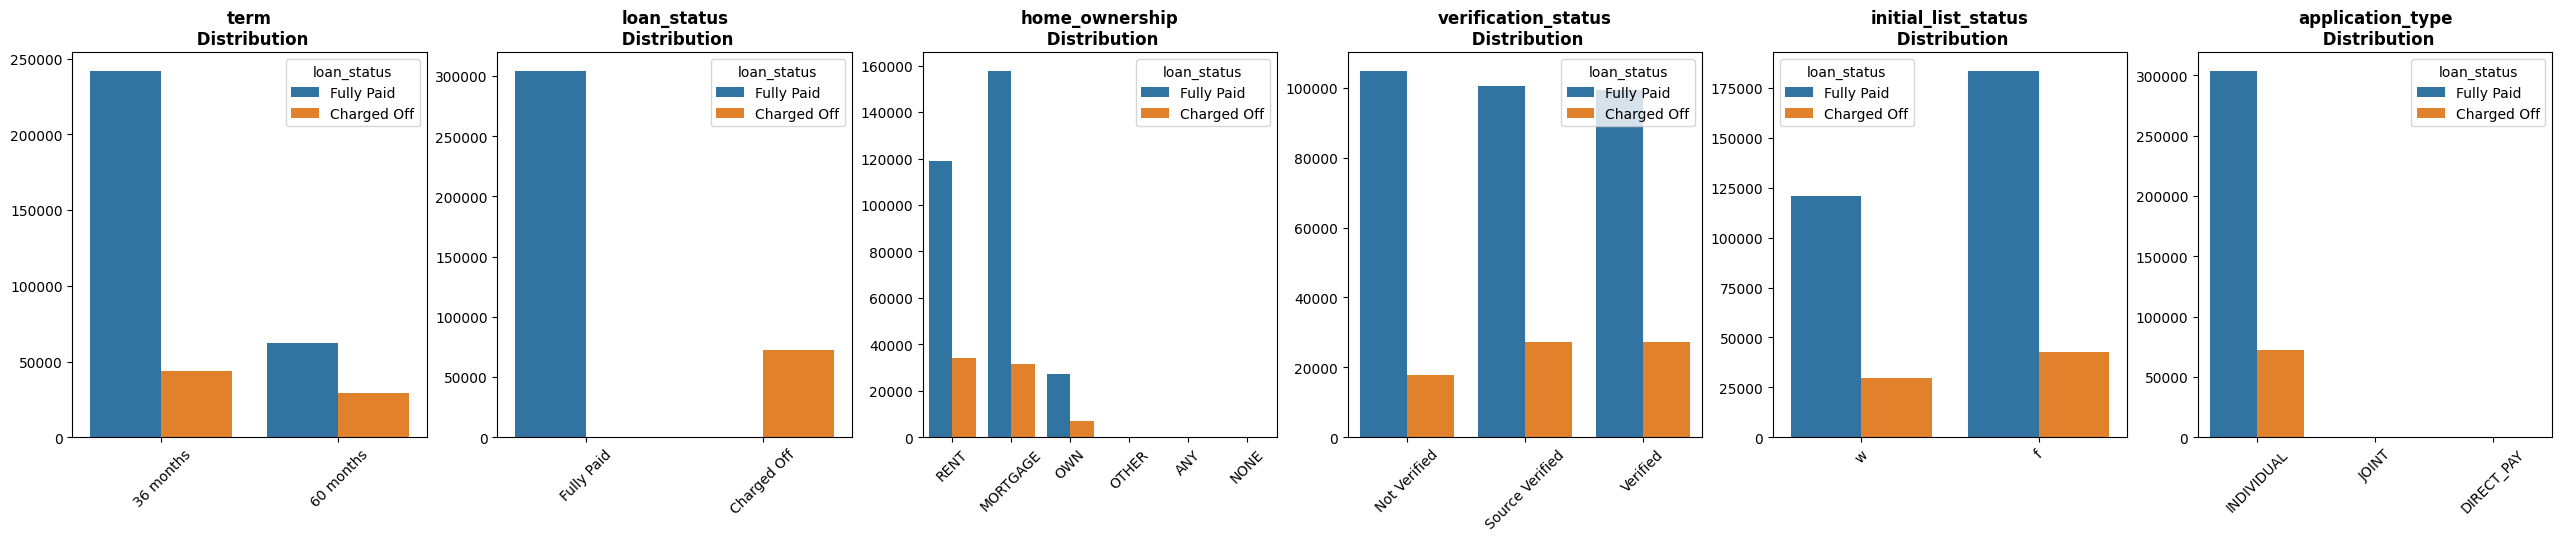

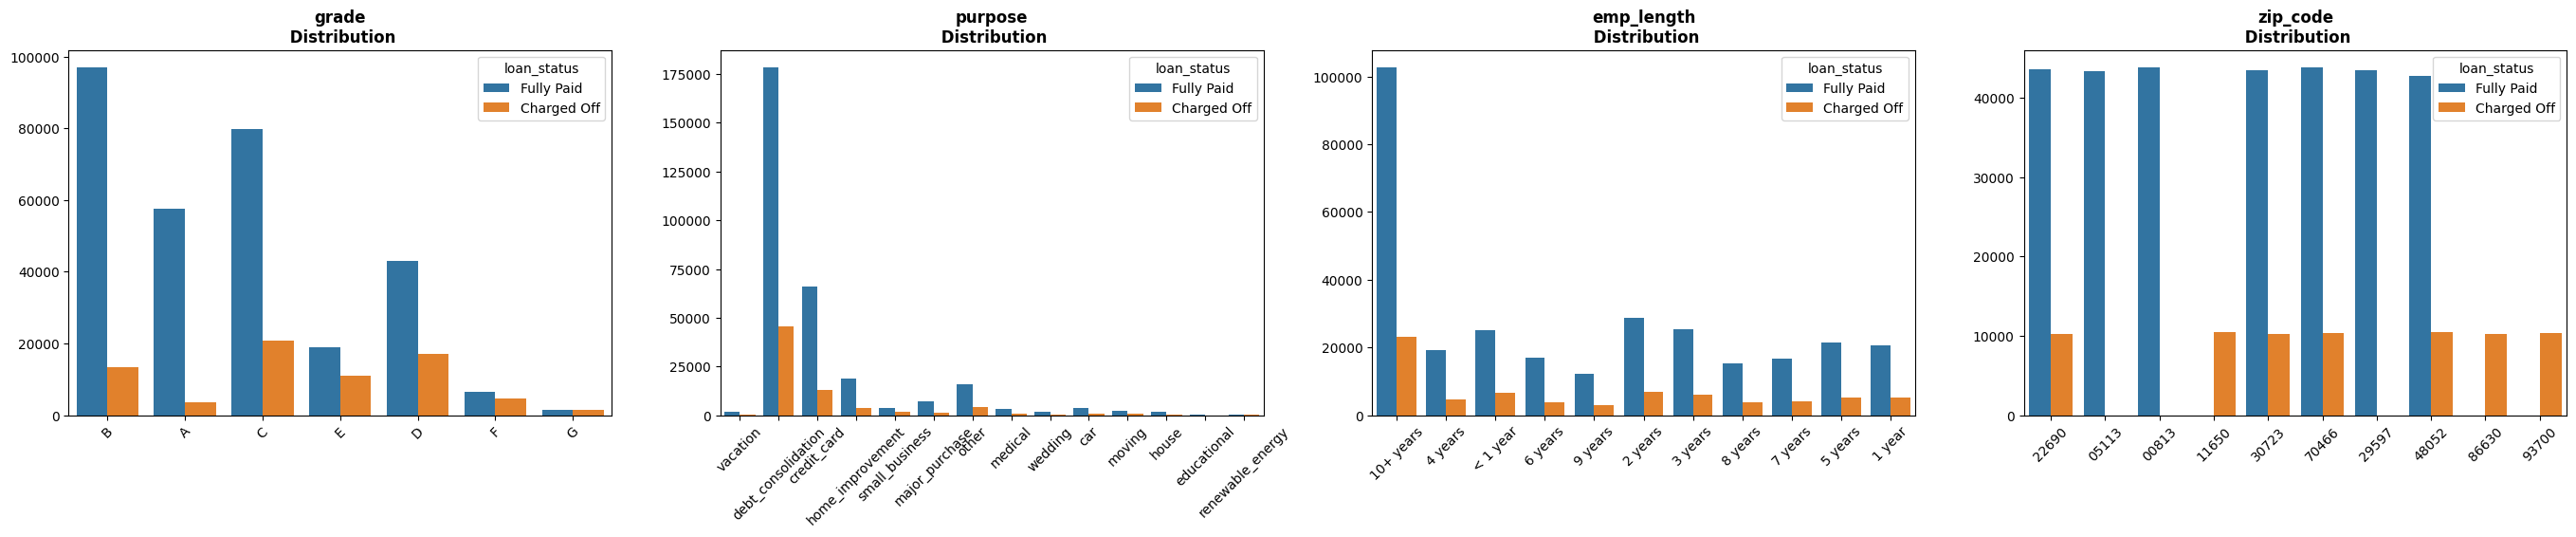

In [ ]:
#Creating Countplot for all Categorical variable Columns in dataset
columns = countplot_columns1
print('-'*70)
print('Univariate Analysis - Countplots of Categorical Columns')
print('-'*70)
plt.figure(figsize=(32,5))
for index, column in enumerate(columns):
    plt.subplot(1,len(columns),index+1)
    sns.countplot(x=column, data=df, hue='loan_status')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.title(column + '\n Distribution', fontsize = 12, fontweight = 'bold')
plt.show()

columns = countplot_columns2
plt.figure(figsize=(34,5))
for index, column in enumerate(columns):
    plt.subplot(1,len(columns),index+1)
    sns.countplot(x=column, data=df, hue='loan_status')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.title(column + '\n Distribution', fontsize = 12, fontweight = 'bold')
plt.show()

In [ ]:
df[["loan_status","loan_amnt"]].groupby(["loan_status"]).aggregate("sum")/df["loan_amnt"].sum()

,loan_amnt
loan_status,
Charged Off,0.207543
Fully Paid,0.792457


In [ ]:
df.loc[df['grade'] == 'A' ,'loan_status'].value_counts(normalize=True)

Fully Paid     0.939821
Charged Off    0.060179
Name: loan_status, dtype: float64

In [ ]:
df['emp_title'].value_counts(normalize=True).head()

Unknown             0.012650
Teacher             0.011636
Manager             0.011270
Registered Nurse    0.004921
RN                  0.004892
Name: emp_title, dtype: float64

* Approximately 80% individuals fully paid back the loan.
* People with grades 'A' are more likely to fully pay their loan as charged off percent is less.
* Maximum loans fully paid by B grade, followed by C & A respectively.
* The majority of people have home ownership as mortgage
* Most purpose of loan are like to Debt. Consolidation followed by credit card.
* 99% applicants have applied under 'individual' application type
* The % of fully paid is much higher for shorter (36-month) term
* Zip codes such as 11650, 86630 and 93700 have 100% defaulters

* **Bivariate Analysis**

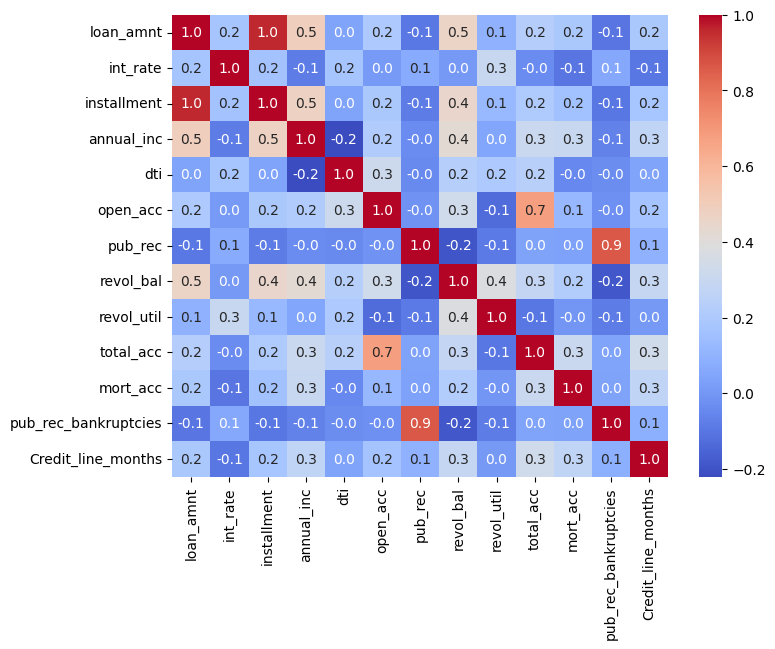

In [ ]:
#Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".1f",cmap='coolwarm')
plt.show()

* Loan_amnt and installment are perfectly correlated
* Total_acc is highly correlated with open_acc
* Total_acc is moderately correlated with mort_acc
* Pub_rec_bankruptcies is highly correlated withpub_rec
* Annual_inc is moderately correlated with loan_amnt and installment
* We can remove some of these correlated features to avoid multicolinearity

#**Data Pre-Processing**

In [ ]:
# Encoding Target Variable

df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [ ]:
df['term']=df['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)

* **One Hot Encoding of Categorical Features**

In [ ]:
one_hot_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
                'purpose', 'initial_list_status', 'application_type']
target_encoding_cols = ['emp_title', 'zip_code', 'state']

In [ ]:
# one hot encoding
newdf = pd.get_dummies(df[one_hot_cols], drop_first=True)
df = pd.concat([newdf, df], axis=1)
df.drop(columns=one_hot_cols, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376929 entries, 0 to 396029
Data columns (total 91 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade_B                              376929 non-null  uint8  
 1   grade_C                              376929 non-null  uint8  
 2   grade_D                              376929 non-null  uint8  
 3   grade_E                              376929 non-null  uint8  
 4   grade_F                              376929 non-null  uint8  
 5   grade_G                              376929 non-null  uint8  
 6   sub_grade_A2                         376929 non-null  uint8  
 7   sub_grade_A3                         376929 non-null  uint8  
 8   sub_grade_A4                         376929 non-null  uint8  
 9   sub_grade_A5                         376929 non-null  uint8  
 10  sub_grade_B1                         376929 non-null  uint8  
 11  sub_grade_B2 

In [ ]:
# target encoding
df['title'] = df.groupby(['title'])['loan_status'].transform('mean')
df['emp_title'] = df.groupby(['emp_title'])['loan_status'].transform('mean')
df['zip_code'] = df.groupby(['zip_code'])['loan_status'].transform('mean')
df['state'] = df.groupby(['state'])['loan_status'].transform('mean')

#**Model Building**

* **Spliting Target Variable**

In [ ]:
# Putting feature variable to X
x = df.drop(columns = 'loan_status', axis = 1)

# Putting response variable to y
y = df['loan_status']

* **Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

* **Train-Test Split & Oversampling with SMOTE**

In [ ]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Using SMOTE to balance the target variable
sm = SMOTE(random_state=42, k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 243471, 1: 58072})
Resampled dataset shape Counter({1: 243471, 0: 243471})


In [ ]:
# Splitting the Training data into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(f'Shape of x_train : {x_train.shape} & shape of y_train is : {y_train.shape}')
print(f'Shape of x_val : {x_val.shape} & shape of y_val is : {y_val.shape}')
print(f'Shape of x_test : {x_test.shape} & shape of y_test is : {y_test.shape}')

Shape of x_train : (241234, 90) & shape of y_train is : (241234,)
Shape of x_val : (60309, 90) & shape of y_val is : (60309,)
Shape of x_test : (75386, 90) & shape of y_test is : (75386,)


#**Logistic Regression**

* **Train in training data and Validate**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_train_preds = model.predict(x_train)
y_val_preds = model.predict(x_val)

#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,y_train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,y_train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,y_train_preds).round(2))

print('\nValidation Accuracy :',model.score(x_val,y_val).round(2))
print('Validation F1 Score:',f1_score(y_val,y_val_preds).round(2))
print('Validation Recall Score:',recall_score(y_val,y_val_preds).round(2))
print('Validation Precision Score:',precision_score(y_val,y_val_preds).round(2))

Train Accuracy : 0.94
Train F1 Score: 0.83
Train Recall Score: 0.76
Train Precision Score: 0.93

Validation Accuracy : 0.94
Validation F1 Score: 0.83
Validation Recall Score: 0.75
Validation Precision Score: 0.93


* **Apply in Testing Data**

In [ ]:
y_test_preds = model.predict(x_test)

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,y_test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,y_test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,y_test_preds).round(2))


Test Accuracy : 0.94
Test F1 Score: 0.84
Test Recall Score: 0.76
Test Precision Score: 0.93


* ** Confusion Matrix**

In [ ]:
conf_mat=confusion_matrix(y_test,y_test_preds)
conf_mat

array([[60193,   776],
       [ 3525, 10892]])

Text(0.5, 1.0, 'Confusion Matrix')

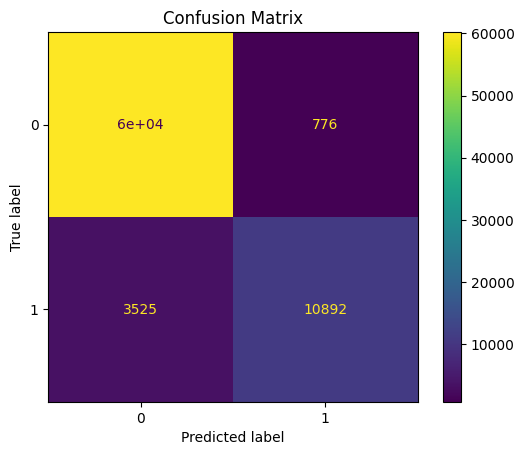

In [ ]:
ConfusionMatrixDisplay(conf_mat).plot()
plt.title('Confusion Matrix')

* **Classification Report**

In [ ]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     60969
           1       0.93      0.76      0.84     14417

    accuracy                           0.94     75386
   macro avg       0.94      0.87      0.90     75386
weighted avg       0.94      0.94      0.94     75386



This report seems to evaluate the performance of a logistic regression model. Here's what each metric signifies:

* **Precision:** For class 0 (the -ve class), the model correctly identifies 94% of the instances predicted as class 0. For class 1 (the +ve class), it correctly identifies 93% of the instances predicted as class 1.

* **Recall:** For class 0, it correctly identifies 99% of the actual class 0 instances. For class 1, it captures 76% of the actual class 1 instances.

* **F1-score:** This metric balances precision and recall into a single number. The F1-score for class 0 is high at 0.97, indicating strong performance in predicting class 0 instances. For class 1, the F1-score is 0.84, slightly lower due to a comparatively lower recall.

* **Accuracy:** The overall accuracy of the model across both classes is 94%. It's crucial to note that while this seems high, it might not be the best metric when dealing with imbalanced datasets.

* **Macro Avg and Weighted Avg:** These values represent the averages of precision, recall, and F1-score. Macro average treats all classes equally, while weighted average considers class imbalance by weighting each class's score by its support (the number of true instances).

Overall, the model performs well in identifying class 0 instances (low credit risk, assuming 0 represents negative instances), but there's room for improvement in correctly identifying class 1 instances (high credit risk, assuming 1 represents positive instances). This model might be particularly sensitive in capturing positive instances, which are crucial in credit assessment scenarios to avoid approving risky applicants.

#**ROC-AUC Curve**

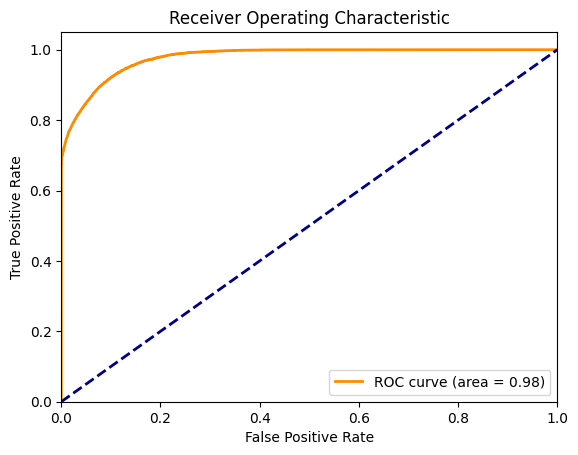

In [ ]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* An ROC curve with an area of 0.98 suggests that the logistic regression model has a high discriminatory ability. The area under the ROC curve (AUC) is a measure of how well the model distinguishes between classes. With an AUC of 0.98, the model showcases strong performance in distinguishing between positive and negative instances.

* A high AUC typically indicates that the model has excellent predictive power across different thresholds and is adept at correctly ranking the probabilities of instances belonging to different classes. In this case, an AUC of 0.98 implies that the model is highly reliable in its predictions, which aligns with the high performance metrics observed in the classification report (precision, recall, and F1-score)

* However, it's important to note that while the AUC is a valuable metric, it's not the only factor to consider. It's essential to assess the model's performance comprehensively, taking into account other metrics like precision, recall, and F1-score, especially in scenarios where class imbalances or specific business needs play a critical role

**Lets plot the Precision-Recall curve which is more suited for evaluation of imbalanced data**

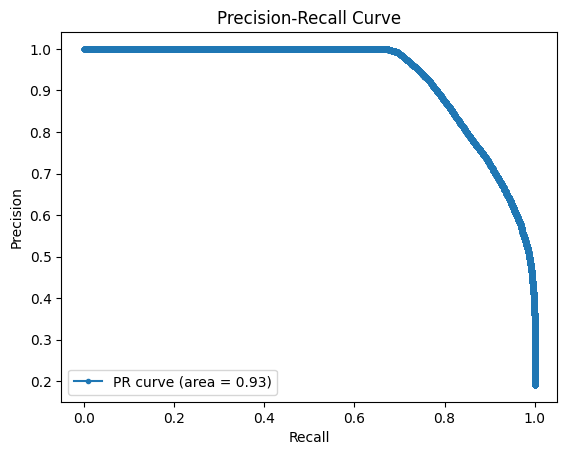

In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

* The Precision-Recall (PR) curve with an area of 0.93 illustrates the model's ability to balance precision and recall across different thresholds.

* A PR curve measures the trade-off between precision (the fraction of relevant instances among the retrieved instances) and recall (the fraction of relevant instances that were retrieved). An area under the PR curve (AUC-PR) of 0.93 indicates strong performance in capturing relevant instances while maintaining precision.

* When dealing with imbalanced datasets or scenarios where the focus is on the minority class (in this case, the positive instances, like high credit risk applicants), the PR curve and its AUC offer valuable insights. A high AUC-PR suggests that the model can identify positive instances (like high credit risk applicants) effectively while keeping false positives in check.

* The model's high AUC in both ROC (0.98) and PR (0.93) curves indicates its overall robustness in distinguishing between classes and effectively capturing relevant instances. This suggests that the model's predictions are reliable and consistent across various evaluation metrics and thresholds.

#**Feature Importance**

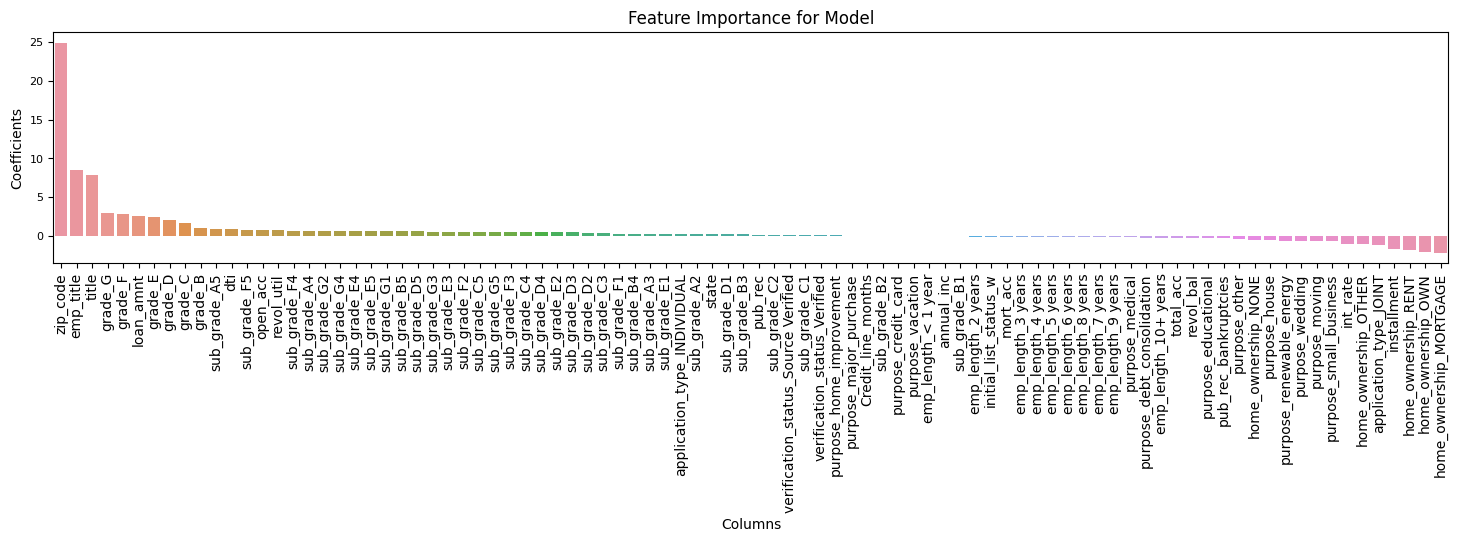

In [ ]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(18,3))
sns.barplot(x = feature_imp['Columns'],
           y =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.xticks(rotation=90)
plt.ylabel("Coefficients")
plt.tight_layout()
plt.show()

* The model has assigned large weightage to zip_code features followed by emp_title, title, grade, loan_amnt
* Similarly, large negative coefficients are assigned to home_ownership, followed by installment, joint application type, int_rate and purpose.

#**Insights and Recommendation :**

**Insight:**

* Overall Statistics of the Model:
  * Accuracy = 94%
  * Precision = 94%
  * Recall = 99%
  * F1 -score = 97%

* Borrower behavior and loan characteristics strongly influence repayment. High loan repayment rates correlate with certain grades (like 'A'), shorter loan terms, and specific loan purposes (e.g., debt consolidation).
* Identified zip codes with 100% defaulters highlight geographic risk factors that need scrutiny.
* Feature correlations (like loan_amnt and installment) suggest redundancy, allowing feature reduction to prevent multicollinearity in models.
* Around 80% of customers have fully paid their Loan Amount. The defaulters are ~ 20%.

**Recommendation:**

* Prioritize 'A' grade applicants and shorter-term loans for lower default risk.
* Implement geographical risk assessments for applicants from high-risk zip codes.
* LoanTap should add slightly stringent rules to bring down this ratio to 5% to 6%
* emp_titel & titel has high Coefficient. Which means LoanTap can also decide their social media based marketing based on person's job-titles.

#**Questionnaire :**

* **Tradeoff Questions :**

**1.** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Ans :** Precision score is an indicator of type1 error. Increasing precision score of the model will minimise false positives and ensure that the company is not losing out on the opportunity to finance worthy individuals.

**2.** Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.

**Ans :** Recall score is an indicator of how many actual defaulters are flagged by the model. By increasing the recall score, we can minimise false negatives (type2 error) and ensure that loans are not disbursed to defaulters

**3.** What percentage of customers have fully paid their Loan Amount?

**Ans :** Around 80.39% of customers have fully paid their Loan Amount.

**4.** Comment about the correlation between Loan Amount and Installment features.

**Ans :** Loan Amount and Installment are perfectly corelated, correlation coefficient is 1.0

**5.** The majority of people have home ownership as _______.

**Ans :** Mortgage.

**6.** People with grades 'A' are more likely to fully pay their loan. (T/F)

**Ans :** True

**7.** Name the top 2 afforded job titles.

**Ans :** Teacher & Manager

**8.** Thinking from a bank's perspective, which metric should our primary focus be on..
 * ROC AUC
 * Precision
 * Recall
 * F1 Score

**Ans :** The best metric to consider is F1 score as we need to give importance to both precision and recall. We don't want to miss potential customers and at the same time we also don't want to give loan to defaulters.

**9.** How does the gap in precision and recall affect the bank?

**Ans :** A wide gap between precision and recall can impact the bank by increasing the risk of approving risky borrowers (low precision) or missing potential creditworthy customers (low recall).

**10.** Which were the features that heavily affected the outcome?

**Ans :**
* The model has assigned large weightage to zip_code features followed by emp_title, title, grade, loan_amnt
* Similarly, large negative coefficients are assigned to home_ownership, followed by installment, joint application type, int_rate and purpose.

**11.** Will the results be affected by geographical location? (Yes/No)

**Ans :** Yes, pincode (derived from address) has significant effect on results.